In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [ ]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 5

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2023-09-17 10:55:05.366346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-17 10:55:05.366529: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/25 [>.............................] - ETA: 10s - loss: 1.6442 - accuracy: 0.2578
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 1s 7ms/step - loss: 1.5174 - accuracy: 0.3345 - val_loss: 1.2701 - val_accuracy: 0.5270
Epoch 2/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.3847 - accuracy: 0.4219
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 0s 2ms/step - loss: 1.2806 - accuracy: 0.4714 - val_loss: 1.0833 - val_accuracy: 0.6753
Epoch 3/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.1746 - accuracy: 0.5391
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 0s 2ms/step - loss: 1.1338 - accuracy: 0.5196 - val_loss: 0.9463 - val_accuracy: 0.6291
Epoch 4/1000
 1/25 [>.............................] - ETA: 0s - loss: 1.0795 - accuracy: 0.5469


/mnt/f/Coding/TrainHandRecognition/py311/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.5858 - val_loss: 0.7419 - val_accuracy: 0.7322
Epoch 6/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.9255 - accuracy: 0.6562
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.6240 - val_loss: 0.6653 - val_accuracy: 0.7322
Epoch 7/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.8308 - accuracy: 0.6094
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [==============================] - 0s 2ms/step - loss: 0.8022 - accuracy: 0.6372 - val_loss: 0.6080 - val_accuracy: 0.7418
Epoch 8/1000
 1/25 [>.............................] - ETA: 0s - loss: 0.7226 - accuracy: 0.6641
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
25/25 [=============

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 967us/step - loss: 0.0289 - accuracy: 0.9990


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 45ms/step
[9.5579278e-01 1.5308190e-09 4.4107508e-02 9.9541605e-05 5.7757333e-08]
0


# Confusion matrix

33/33 [==============================] - 0s 584us/step


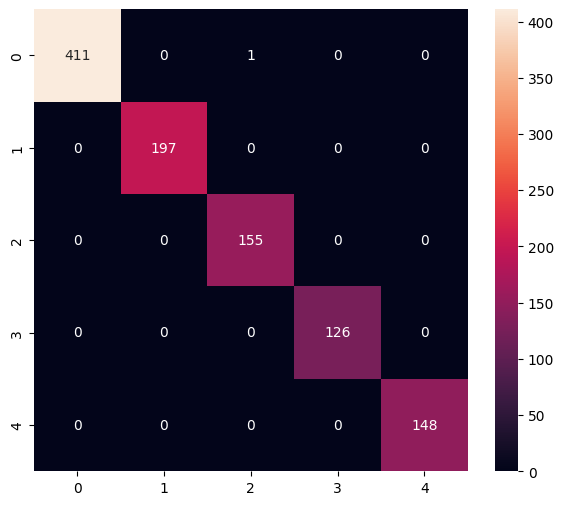

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       197
           2       0.99      1.00      1.00       155
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00       148

    accuracy                           1.00      1038
   macro avg       1.00      1.00      1.00      1038
weighted avg       1.00      1.00      1.00      1038



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/mnt/f/Coding/TrainHandRecognition/py311/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpe5wvm6cr/assets


INFO:tensorflow:Assets written to: /tmp/tmpe5wvm6cr/assets
2023-09-17 10:55:18.888431: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-17 10:55:18.888475: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-17 10:55:18.889222: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpe5wvm6cr
2023-09-17 10:55:18.889759: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-09-17 10:55:18.889768: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpe5wvm6cr
2023-09-17 10:55:18.892757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-09-17 10:55:18.893390: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-09-17 10:55:18.920074: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6588

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 121 µs, sys: 28 µs, total: 149 µs
Wall time: 126 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5579267e-01 1.5308158e-09 4.4107582e-02 9.9541590e-05 5.7757433e-08]
0
